# Import Python Libraries

In [31]:
#library
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 1. Preparing
### a) Read the dataset
### b) Explore the Dataset
### c) Preprocessing

### Read the Dataset

In [4]:
data = pd.read_csv('StudentsPerformance.csv')

In [5]:
# Tampilkan 5 baris data dilayar
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# baca ukuran data: baris, kolom
data.shape

(1000, 8)

In [7]:
# Baca seluruh kolom (Fitur + target)
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
# melihat apakah ada data yang hilang atau tidak
print(data.isnull().any())

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool


### Explore the Dataset

In [9]:
# Informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
data_XY = data[['math score','reading score','writing score']]

In [11]:
# merangkum properti statistik set data, seperti count, mean, min, dan max:
data_XY.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


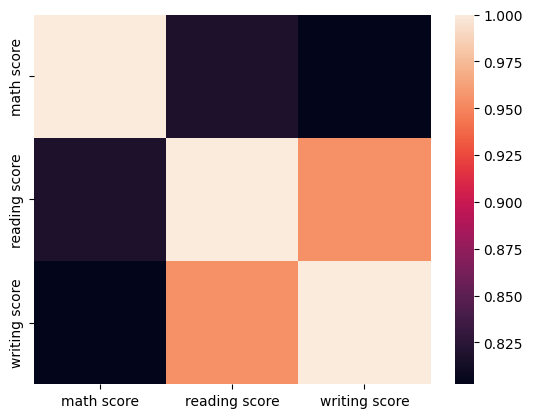

In [12]:
# korelasi antar data
sns.heatmap(data_XY.corr());

In [13]:
# menampilkan korelasi antara variabel yang berbeda dalam dataset
data_XY.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


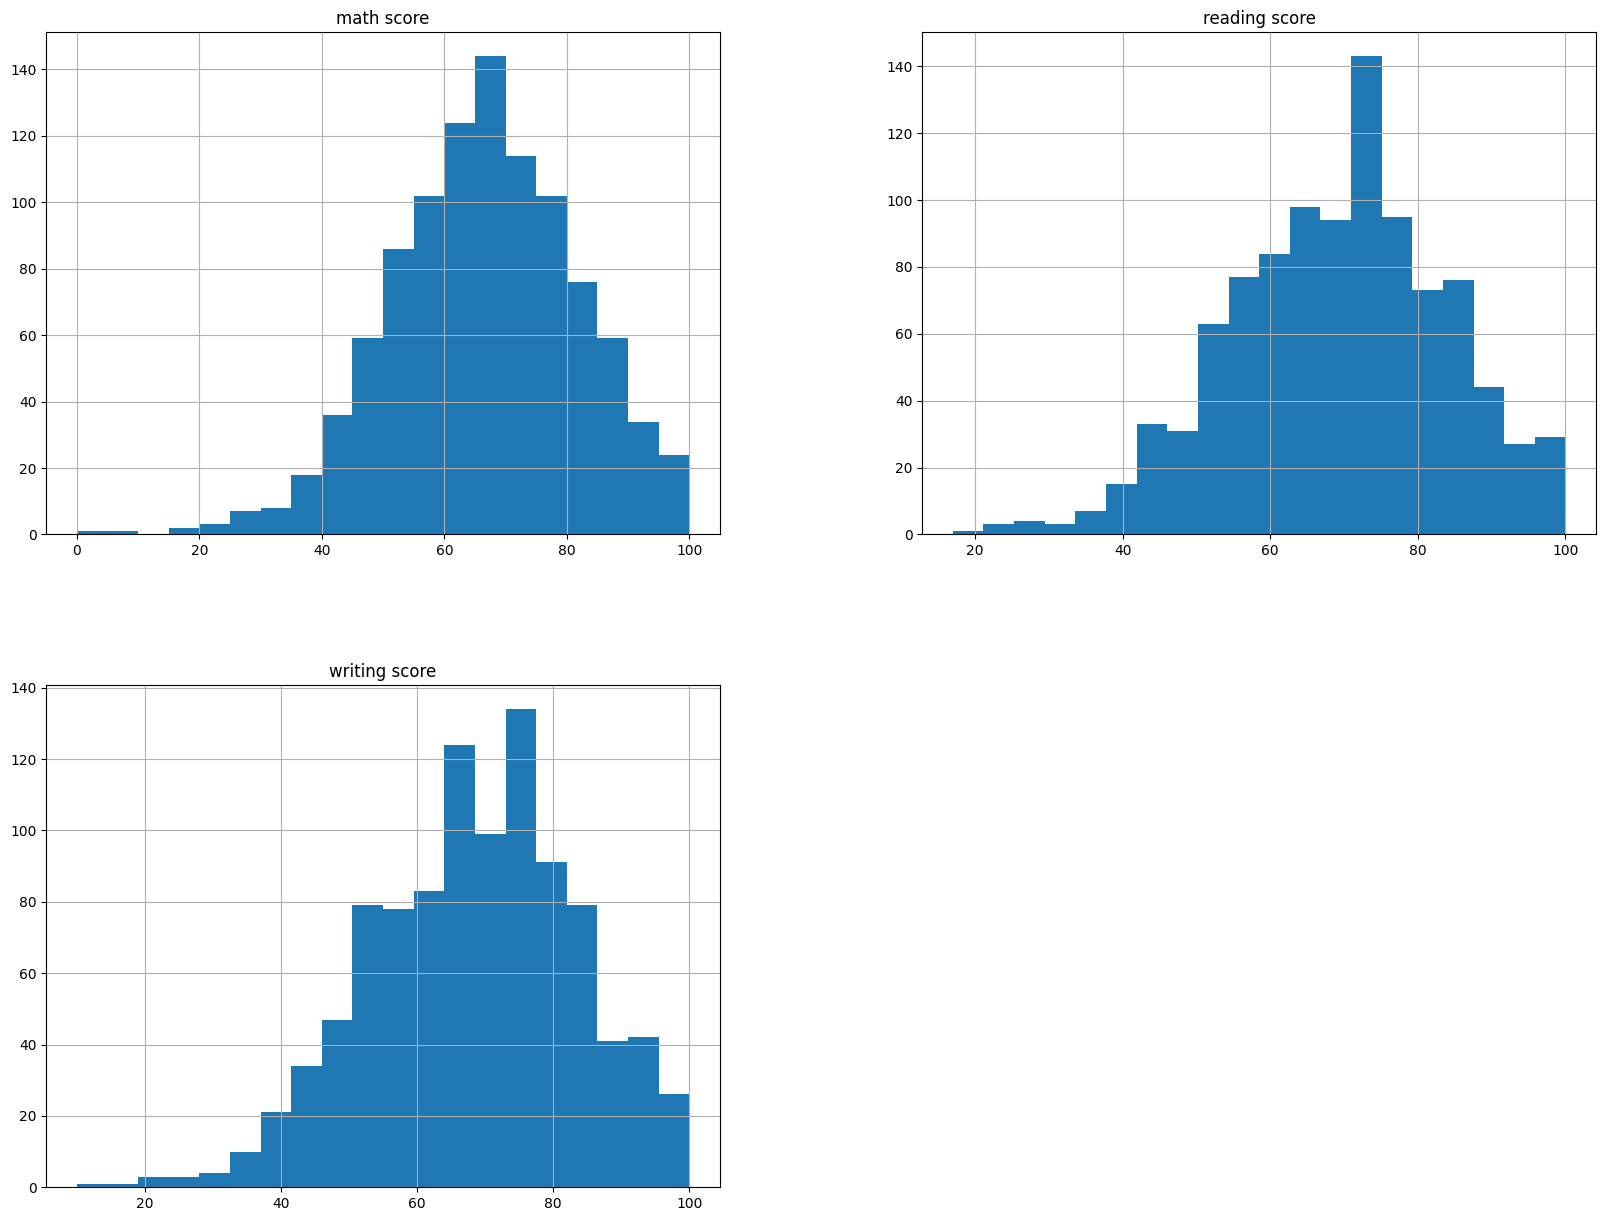

In [17]:
# Lihat distribusi data menggunakan Histogram
# ===========================================
data_XY.hist(bins=20, figsize=(20,15))
plt.show()

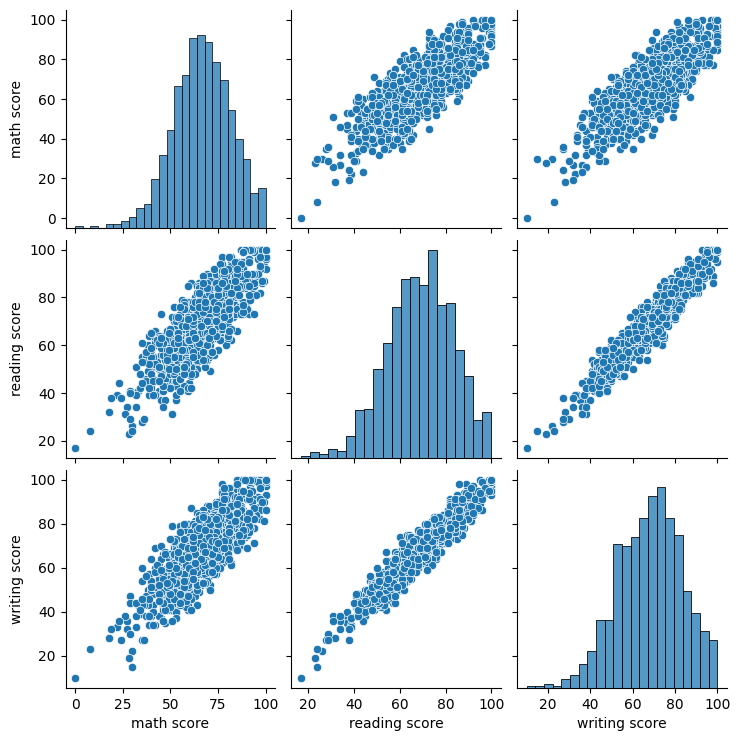

In [18]:
# tampilkan korelasi antar fitur dan histogramnya
data_hist_1 = data[['math score','reading score','writing score']]
sns.pairplot(data_hist_1)

In [108]:
# Data fitur
# ===============================
X = data[['math score','reading score','writing score']]
#X = data.iloc[:, [6, 7]].values


### Preprocessing:(Normalisasi, Seleksi fitur, Ekstraksi fitur, dll)

In [109]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)  # X_normal


# 3. Build a Model

### a. Pemilihan Model


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

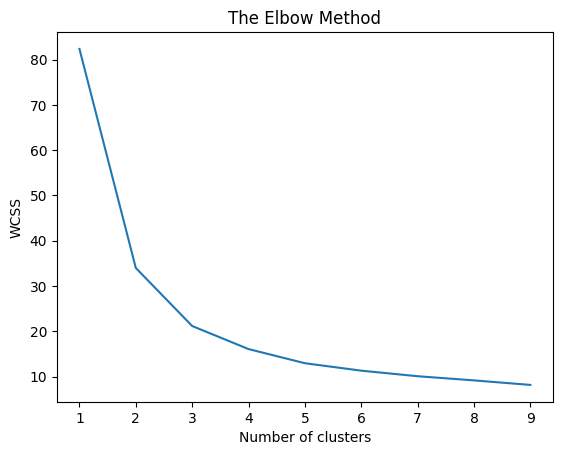

In [114]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### b.Training the Model

In [117]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 3. Visualisasi The Cluster

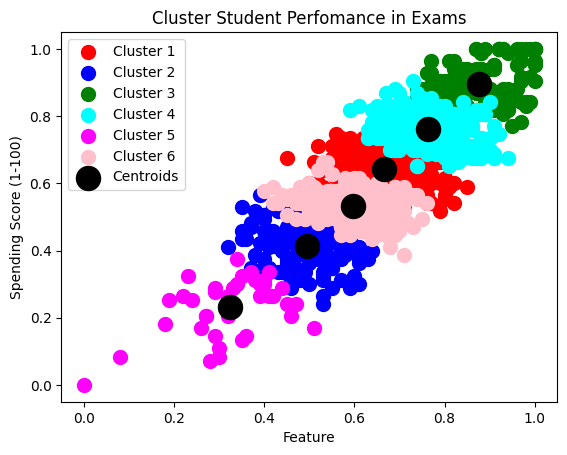

In [118]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'pink', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Black', label = 'Centroids')
plt.title('Cluster Student Perfomance in Exams')
plt.xlabel('Feature')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 4. Evaluasi


In [119]:
# Evaluation
#labels = kmeans.labels_
from sklearn.metrics import davies_bouldin_score
w=davies_bouldin_score(X, y_kmeans)
print("Score davies bouldin ")
print(w)

Score davies bouldin 
0.9770022833310095


Nilai (score davies bouldin) yang didapat dengan seleksi fitur :
1. fitur(match score,reading score & writing score)
   
   a. (kmeans = 6) => 0.9770022833310095

   b. (kmeans = 5) => 0.9152520844082123
    
   c. (kmeans = 4) => 0.8528936366362754

   d. (kmeans = 3) => 0.7850762539846009

2. fitur(reading score & writing score)
   
   a. (kmeans = 6) => 0.683862295434594

   b. (kmeans = 5) => 0.6579092916124263
    
   c. (kmeans = 4) => 0.648642361401799

   d. (kmeans = 3) => 0.6309105213483784

1. fitur(match score & reading score)
   
   a. (kmeans = 6) => 0.8967392033257745

   b. (kmeans = 5) => 0.881644684121828
    
   c. (kmeans = 4) => 0.84449106397928

   d. (kmeans = 3) => 0.7706783122267756

1. fitur(match score & writing score)
   
   a. (kmeans = 6) => 0.8930823867152201

   b. (kmeans = 5) => 0.8926797313968811
    
   c. (kmeans = 4) => 0.8755626289005898

   d. (kmeans = 3) => 0.7845491854855738

Karna nilai yang tinggi terdapat pada fitur(math score,reading score, & writing score) dengan jumlah cluster 6
   